# FLow:
1. Find Data
2. Preprocessing (Resize, Labeling, Balance, Shuffle, Train(validate and test split)
3. ANN Architecture (Layers, Input, Output, Compile:optimizer,loss,metrics)
4. Training (Fit,Hyper parameters optimization, Validation, Plot) - Reiterative process
5. Evaluate (test)
6. Deploy
7. Invoice

In [1]:
import os, shutil

original_dataset_dir = "cats_vs_dogs/train"

dirs = []

base_dir = "cats_vs_dogs_small"
dirs.append(base_dir)

In [2]:
"""
All this code create a subfolder for a smaller set for training and test with subfolders where 
we divide cats by dogs so when we define the class_mode=binary in the generator, he has alerady 
the images splitted in folder in classes. What else we could do is to have more than two 
classes switching to class_mode=categorical so we could have as many classes as we want
"""

train_dir = os.path.join(base_dir, "train")
dirs.append(train_dir)
validation_dir = os.path.join(base_dir, "validation")
dirs.append(validation_dir)
test_dir = os.path.join(base_dir, "test")
dirs.append(test_dir)

train_cats_dir = os.path.join(train_dir, "cats")
dirs.append(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, "dogs")
dirs.append(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, "cats")
dirs.append(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, "dogs")
dirs.append(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, "cats")
dirs.append(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, "dogs")
dirs.append(test_dogs_dir)

for directory in dirs:
    if not os.path.exists(directory):
       os.mkdir(directory)

fnames = ["cat.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["cat.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copy(src, dest)

fnames = ["dog.{}.jpg".format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copy(src, dest)

for directory in dirs:
    print(directory, ":", len(os.listdir(directory)))

print("Done.")

cats_vs_dogs_small : 3
cats_vs_dogs_small/train : 2
cats_vs_dogs_small/validation : 2
cats_vs_dogs_small/test : 2
cats_vs_dogs_small/train/cats : 1000
cats_vs_dogs_small/train/dogs : 1000
cats_vs_dogs_small/validation/cats : 500
cats_vs_dogs_small/validation/dogs : 500
cats_vs_dogs_small/test/cats : 500
cats_vs_dogs_small/test/dogs : 500
Done.


In [3]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(
    32, (3, 3),  #in the output which is the probability of the 32 of edges
    activation="relu",
    input_shape=(150, 150, 3)))  #color image RGB and 150x150px
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.25))  #added later --> randomly set weights to 0 or small numbers
#put some stress to neural network and tend to generalize better
#to reduce overfitting we could also reduce our NN (make it smaller)
#to reduce overfitting also add more data
#to reduce overfitting also adding Dropout
#also weight regularization (Advanced topic)
#also with data augmentation
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

#it is possible to plot the output the output of the layers (check on internet)

Using TensorFlow backend.
/Users/luigibungaro/dsr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
from keras import optimizers
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [5]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary'    #2 subfolder with cats ad dogs splitted
        #class mode could be also categorical (just put as many folder as the classes are)
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [28]:
len(train_generator)

100

In [6]:
history = model.fit_generator(
    train_generator,   #providing data during training in real time without loading on HD
    steps_per_epoch=100,  #number of sample divided by the batch size
    epochs=30,
    validation_data = validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 128s 1s/step - loss: 0.6856 - acc: 0.5420 - val_loss: 0.6890 - val_acc: 0.5160
Epoch 2/30
100/100 [==============================] - 125s 1s/step - loss: 0.6543 - acc: 0.6250 - val_loss: 0.6526 - val_acc: 0.5910
Epoch 3/30
100/100 [==============================] - 136s 1s/step - loss: 0.6117 - acc: 0.6690 - val_loss: 0.5993 - val_acc: 0.6710
Epoch 4/30
100/100 [==============================] - 126s 1s/step - loss: 0.5677 - acc: 0.7145 - val_loss: 0.5770 - val_acc: 0.6980
Epoch 5/30
100/100 [==============================] - 123s 1s/step - loss: 0.5356 - acc: 0.7315 - val_loss: 0.5831 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 126s 1s/step - loss: 0.5055 - acc: 0.7430 - val_loss: 0.5983 - val_acc: 0.6670
Epoch 7/30
100/100 [==============================] - 123s 1s/step - loss: 0.4826 - acc: 0.7640 - val_loss: 0.6069 - val_acc: 0.6860
Epoch 8/30
100/100 [==============================] - 124s 1s/step - 

In [27]:
#overfitting because training accuracy is higher than the validation accuracy
train_dir

'cats_vs_dogs_small/train'

Found 2000 images belonging to 2 classes.


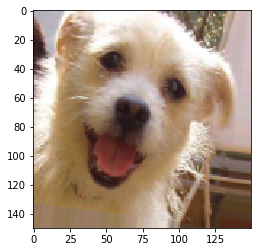

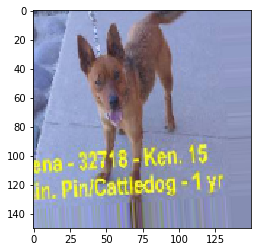

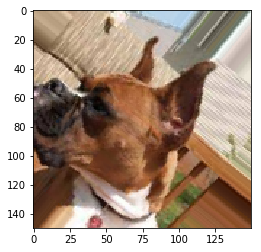

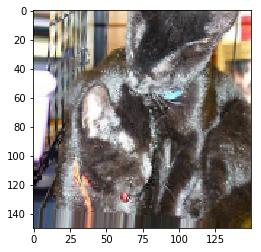

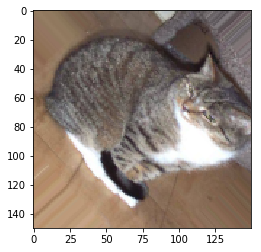

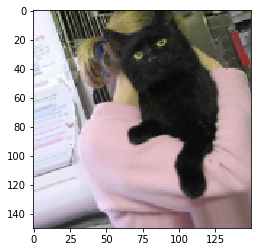

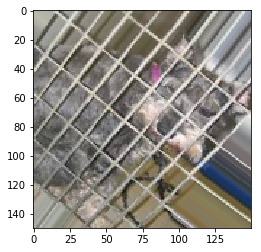

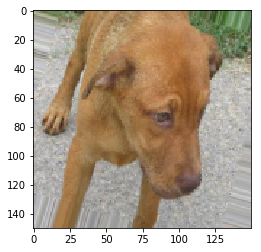

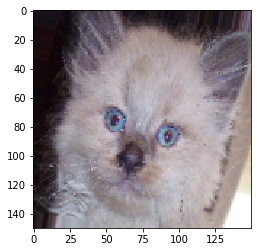

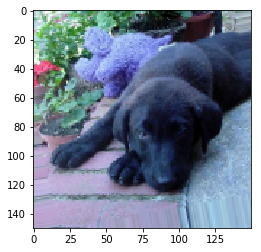

In [26]:
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=50,
    width_shift_range=20,
    height_shift_range=20,
)

generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=10,
    class_mode="binary"
)

import matplotlib.pyplot as plt
%matplotlib inline

images = next(generator)[0]
for image in images:
    plt.imshow(image)
    plt.show()
    plt.close()

In [22]:
#for image in image[0]  -----to check
print(len(images))
print(images[0].shape,images[1])
for image in images[0]:
    plt.imshow()
    plt.close()

10
(150, 150, 3) [[[0.22732925 0.22340769 0.20772141]
  [0.2194398  0.21551824 0.19983196]
  [0.22056192 0.21664035 0.20095408]
  ...
  [0.6445121  0.6624139  0.65184593]
  [0.65648526 0.6731897  0.6662137 ]
  [0.66756254 0.6832488  0.67932725]]

 [[0.22373731 0.21981575 0.20412947]
  [0.22542638 0.22150481 0.20581853]
  [0.21577266 0.21185109 0.19616482]
  ...
  [0.67426103 0.6899473  0.68602574]
  [0.68024755 0.6959338  0.69201225]
  [0.6862342  0.70192045 0.6979989 ]]

 [[0.22014537 0.2162238  0.20053753]
  [0.23134832 0.22742675 0.21174048]
  [0.21274136 0.20881979 0.19313352]
  ...
  [0.6862745  0.7019608  0.69803923]
  [0.6862745  0.7019608  0.69803923]
  [0.6862745  0.7019608  0.69803923]]

 ...

 [[0.8313726  0.83921576 0.82745105]
  [0.8313726  0.83921576 0.82745105]
  [0.8290933  0.8369364  0.8251717 ]
  ...
  [0.8833101  0.8833101  0.8833101 ]
  [0.882353   0.882353   0.882353  ]
  [0.88494295 0.88494295 0.88494295]]

 [[0.8237345  0.83157766 0.81981295]
  [0.8189453  0.8267

TypeError: imshow() missing 1 required positional argument: 'X'

In [13]:
def generate():
    i=0
    while True:
            i +=1
            yield i
g = generate()
print(g)
print(next(g))
print(next(g))
print(next(g))

<generator object generate at 0x12123b938>
1
2
3


In [15]:
#this is the generator simplified
def generate(batch_size):
    i=0
    while True:
        arr=[]
        for _ in range(batch_size):
            i+=1
            arr.append(i)
        yield arr
            
g = generate(2)
print(g)
print(next(g))
print(next(g))
print(next(g))

<generator object generate at 0x1168c9360>
[1, 2]
[3, 4]
[5, 6]
